In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Neural Network from Scratch with Only Numpy ###

##### Important Functions #####

In [252]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

def sigmoid(argument):
    return 1/(1+np.exp(-argument))

def sigmoid_prime(argument):
    s = sigmoid(argument)
    return s * (1 - s)

def softmax(argument):
    return np.exp(argument) / np.sum(np.exp(argument))

def mean_squared_error(y_true, y_pred):
    n = len(y_true)  # Número de amostras
    mse = np.sum((y_true - y_pred) ** 2) / n
    return mse

##### Layer Implementation #####

In [255]:
class Layer:
    def __init__(self, input_neurons, output_neurons, output_data):
        self.output_data = output_data
        self.input_neurons = input_neurons
        self.output_neurons = output_neurons
        self.weights = np.random.randn(self.output_neurons, self.input_neurons)
        self.bias = np.random.randn(self.output_neurons, 1)

    def forwardPropagation(self, input_data):
        self.input_data = input_data
        self.z = np.dot(self.weights, self.input_data) + self.bias

    def applyActivationForward(self, activation_function):
        self.activation_function = activation_function
        
        if self.activation_function == 'sigmoid':
            return sigmoid(self.z)
        
    def backPropagation(self, output_gradient, learning_rate):
        n = self.input_data.shape[1]

        weights_gradient = np.dot(output_gradient, self.input_data.T)
        self.weights = self.weights - learning_rate * weights_gradient
        self.bias = self.bias - learning_rate * output_gradient
        return np.dot(self.weights.T, output_gradient)
    
    def applyActivationBackward(self, output_gradient):
        if self.activation_function == 'sigmoid':
            return np.multiply(output_gradient, sigmoid_prime(self.input_data))

##### Neural Network implementation: a collection of layers #####

In [256]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers

    def train(self, x, y, epochs, learning_rate):
        errors = []
        for i in range(epochs):
            error = 0
            for x_sample, y_sample in zip(x,y):
            
                #forward propagation
                output = x_sample
                for layer in self.layers:
                    layer.forwardPropagation(output)
                    output = layer.applyActivationForward('sigmoid')

                error += mse(y_sample, output)
                
                
                #backward propagation
                grad = mse_prime(y_sample, output)
                for layer in reversed(self.layers):
                    grad = layer.backPropagation(grad, learning_rate)
                    grad = layer.applyActivationBackward(grad)
                
            errors.append(error)

        return errors
    
    def predict(self, X):
        prediction = []
        for x in X:
            output = x
            for layer in self.layers:
                output = layer.forwardPredict(output)

            prediction.append(output)

        return prediction

##### Examples #####

##### 1. Training Neural Network to predict XOR #####

In [265]:
x_xor = np.array([[[0,0], [0,1], [1,0], [1,1]]]).reshape(4,2,1)
y_xor = np.array([[[0,1,1,0]]]).reshape(4,1,1)

layer1 = Layer(2,3,y_xor)
layer2 = Layer(3,1,y_xor)

layers = [layer1, layer2]

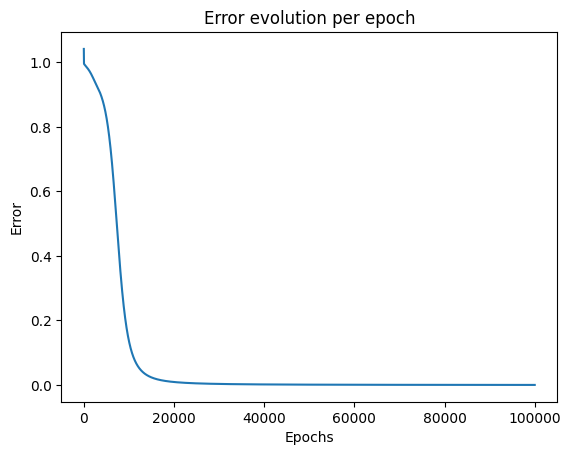

In [266]:
epochs = 100000

#training neural network and plotting error graph
NN_Xor = NeuralNetwork(layers)
errors = NN_Xor.train(x_xor, y_xor, epochs, 0.01)

#graph showing error
plt.plot(np.arange(epochs), errors)
plt.title("Error evolution per epoch")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()
